In [1]:
import io
import sqlite3

from sklearn.datasets import make_blobs
import pandas
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import numpy
from sklearn.manifold import TSNE


def adapt_array(arr):
    out = io.BytesIO()
    numpy.save(out, arr)
    out.seek(0)
    return sqlite3.Binary(out.read())


def convert_array(text):
    out = io.BytesIO(text)
    out.seek(0)
    return numpy.load(out)

In [2]:
data = pandas.read_pickle("/disk2/ksebestyen/embeddings_wolf_all.pkl")
X = numpy.array([value for value in data["embedding"].values])

In [4]:
#data

,index,term,token_id,year,embedding,year_y
0,0,wolf,1237749,1847,"[1.2233986, 1.5405083, -0.38931495, 0.19706914...",1847
1,1,wolf,1308655,1851,"[0.5794932, 0.3281636, 0.19705923, -0.29770532...",1851
2,2,wolf,1308657,1851,"[0.6742365, 0.8266374, -0.12354943, -0.2908198...",1851
3,3,wolf,1308661,1851,"[0.85816497, 0.5010049, -0.12645736, -0.144174...",1851
4,4,wolf,1308663,1851,"[0.5991235, 0.32790303, 0.37341413, 0.02325187...",1851
...,...,...,...,...,...,...
29122,29122,wolf,2696590,1920,"[0.7348308, 0.06525132, 0.17435437, -0.3881040...",1920
29123,29123,wolf,2696591,1920,"[0.59308016, -0.3669514, 0.0067691426, -0.9926...",1920
29124,29124,wolf,2696617,1920,"[-0.7754593, 0.69695336, -0.20653927, -0.18595...",1920
29125,29125,wolf,2696631,1920,"[0.90317404, 0.5334336, -0.8630948, 0.33934867...",1920


In [5]:
# Instantialte tsne, specify cosine metric
tsne = TSNE(random_state=0, n_iter=1000, metric='cosine')

# Fit and transform
embeddings2d = tsne.fit_transform(X)

/disk2/ksebestyen/pythonEnvironment/lib/python3.6/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


In [6]:
# Create DF
embeddingsdf = pandas.DataFrame()  # Add game names
# embeddingsdf['year'] = dataFromDBDataFrame["year"]  # Add x coordinate
embeddingsdf['x'] = embeddings2d[:, 0]  # Add y coordinate
embeddingsdf['y'] = embeddings2d[:, 1]  # Check
embeddingsdf.head()

,x,y
0,-22.609537,77.145515
1,3.527275,14.119714
2,56.731495,4.243872
3,22.226883,17.028372
4,66.750237,7.409631


In [7]:
# Cluster
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

For n_clusters = 2 The average silhouette_score is : 0.0913635
For n_clusters = 3 The average silhouette_score is : 0.09979084
For n_clusters = 4 The average silhouette_score is : 0.11368192
For n_clusters = 5 The average silhouette_score is : 0.124891154
For n_clusters = 6 The average silhouette_score is : 0.12873887
For n_clusters = 7 The average silhouette_score is : 0.13945809
For n_clusters = 8 The average silhouette_score is : 0.07972005
For n_clusters = 9 The average silhouette_score is : 0.14666921
For n_clusters = 10 The average silhouette_score is : 0.15229636
For n_clusters = 11 The average silhouette_score is : 0.097755335
For n_clusters = 12 The average silhouette_score is : 0.15941341
For n_clusters = 13 The average silhouette_score is : 0.15734681
For n_clusters = 14 The average silhouette_score is : 0.10627178


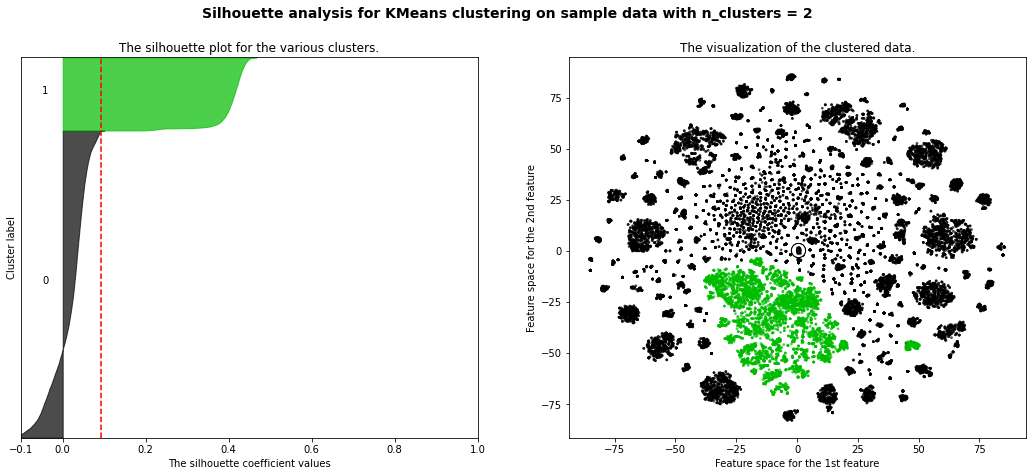

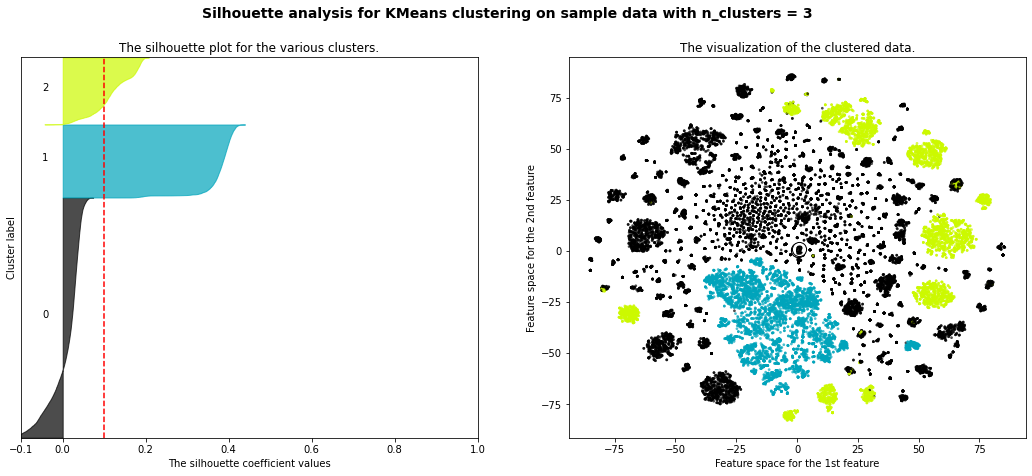

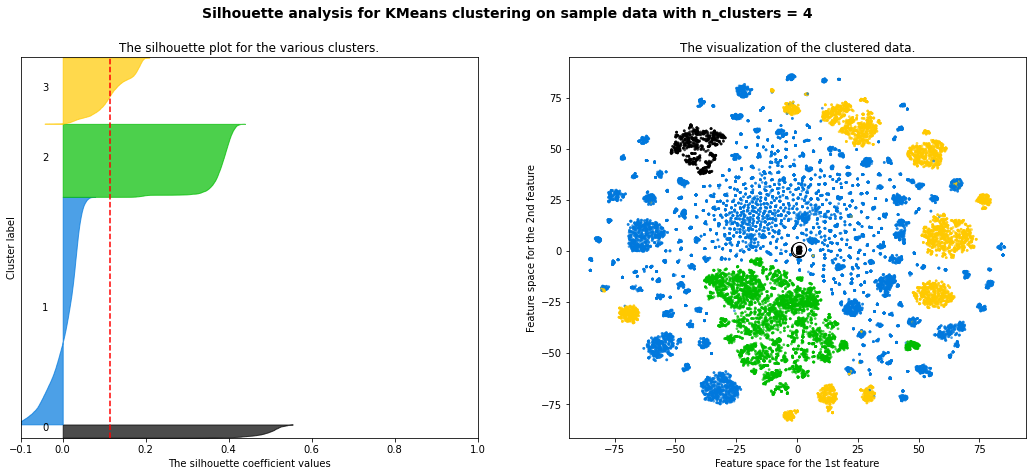

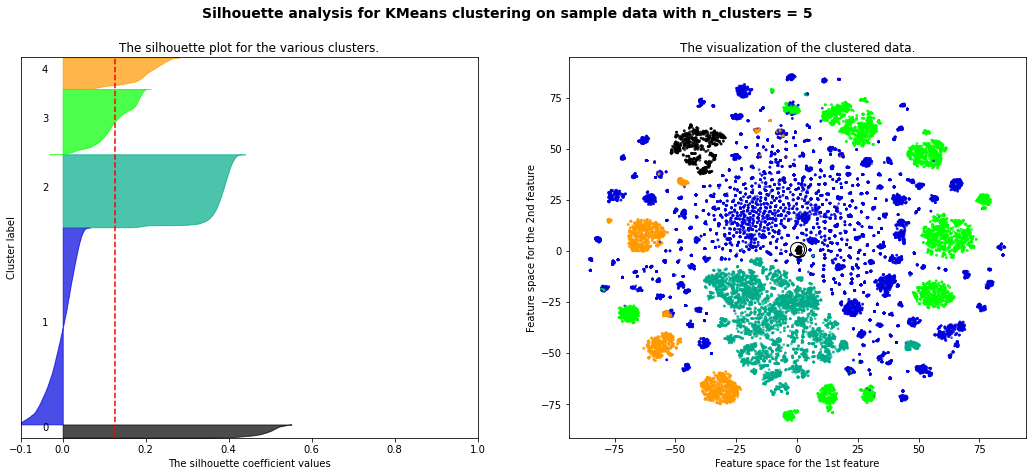

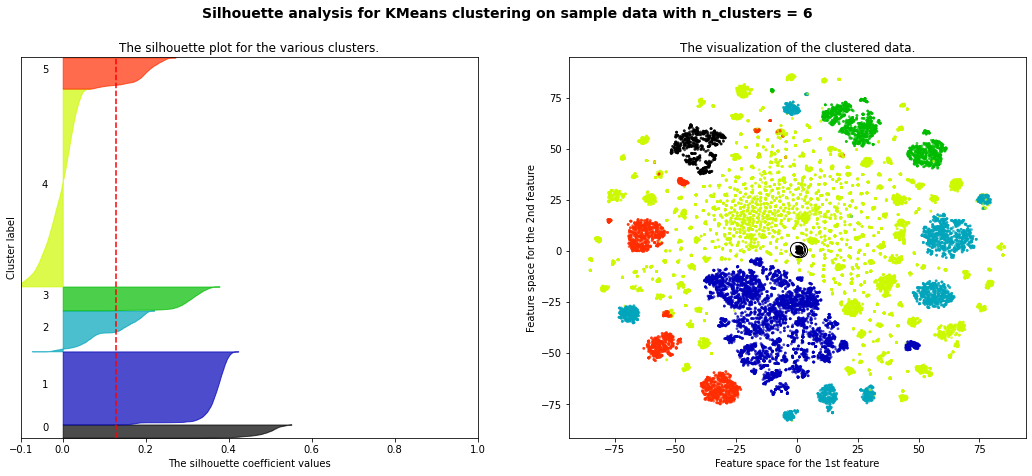

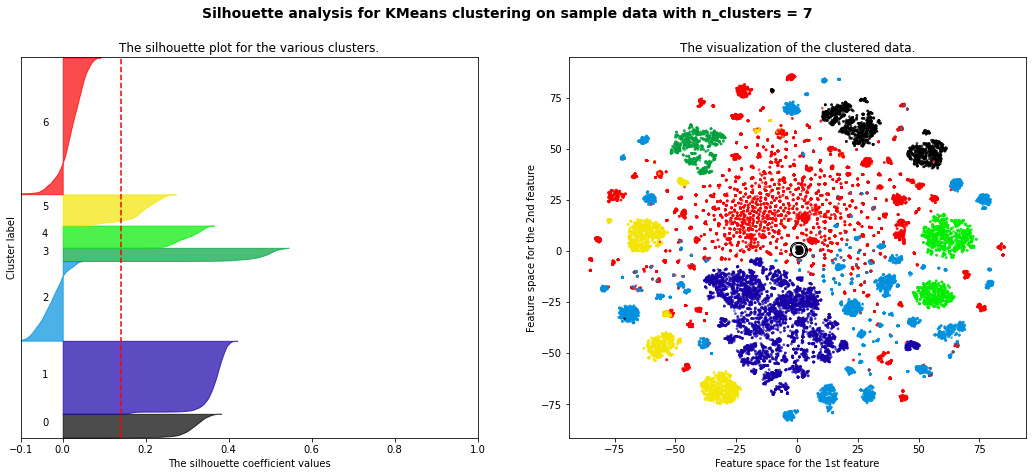

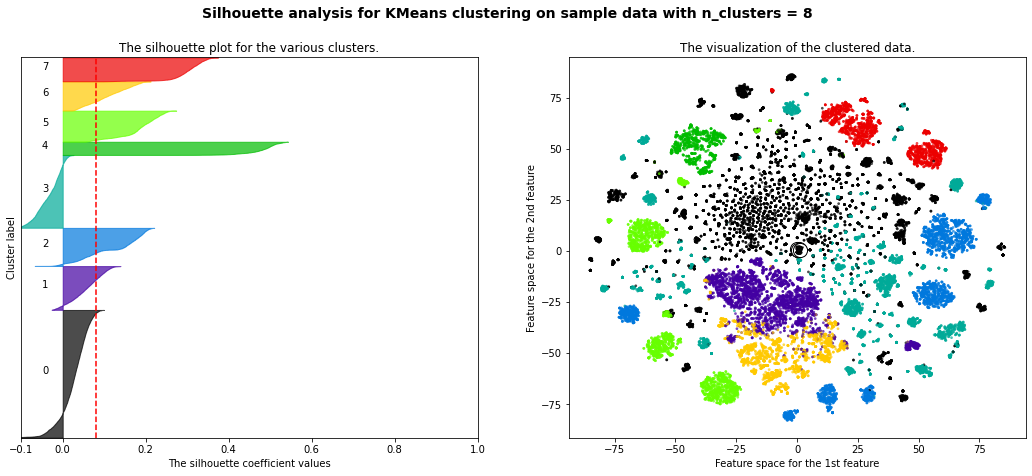

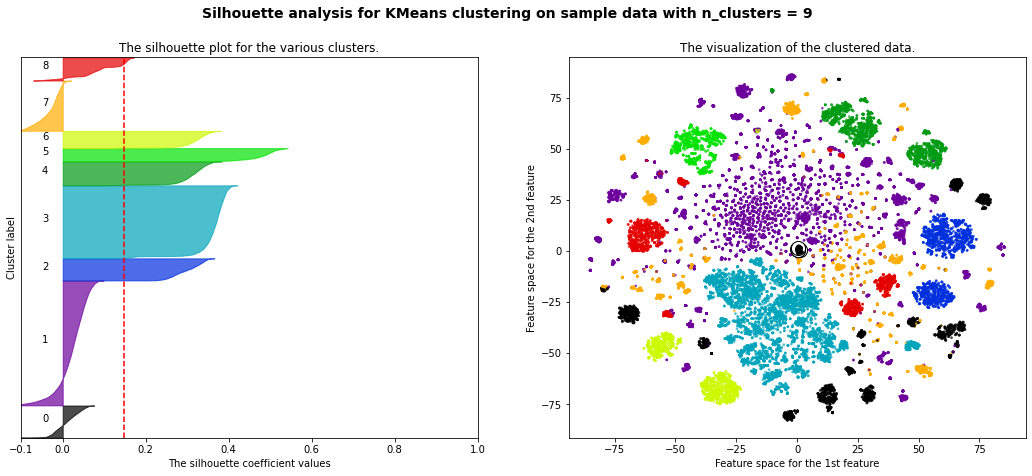

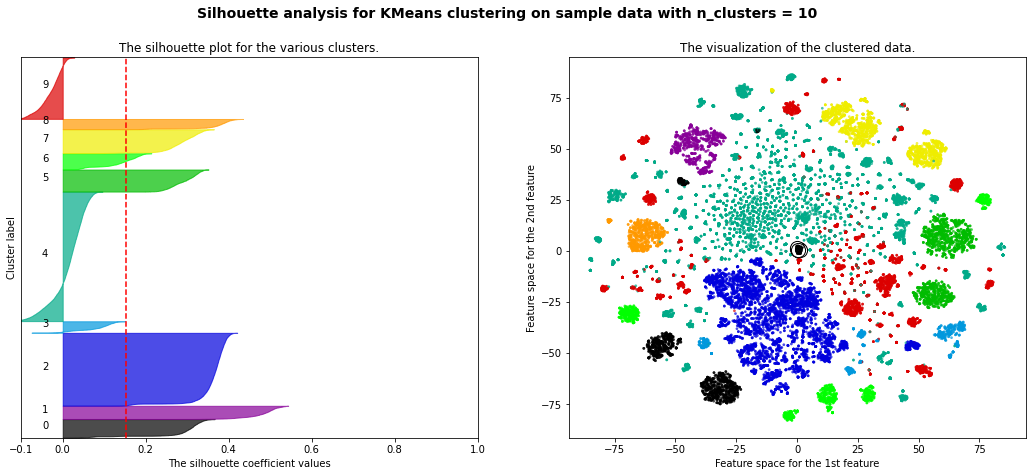

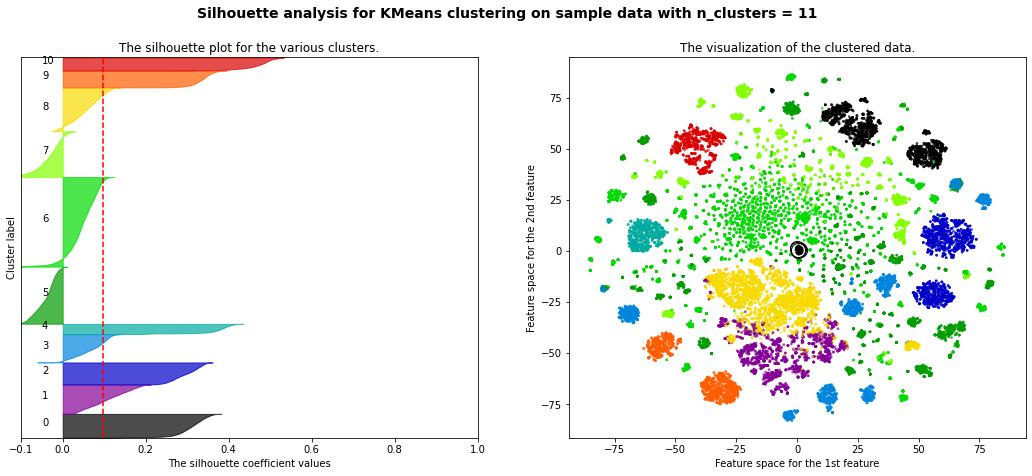

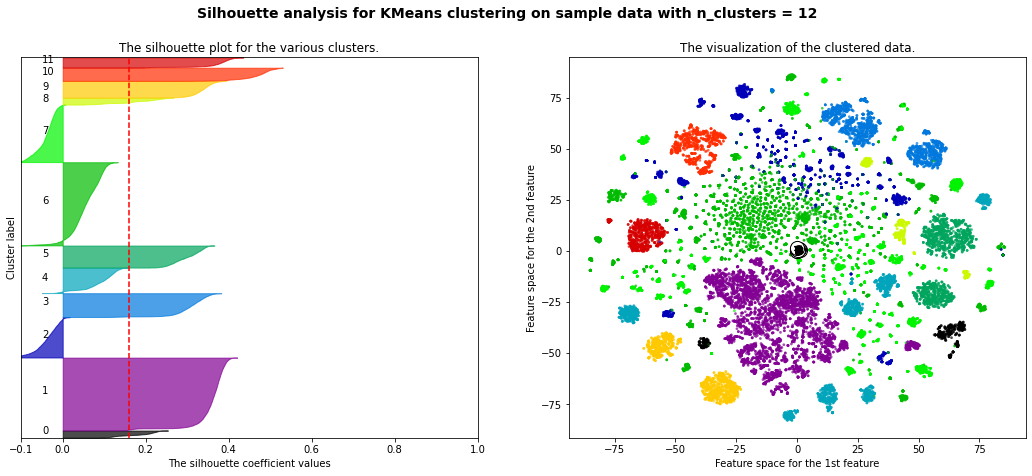

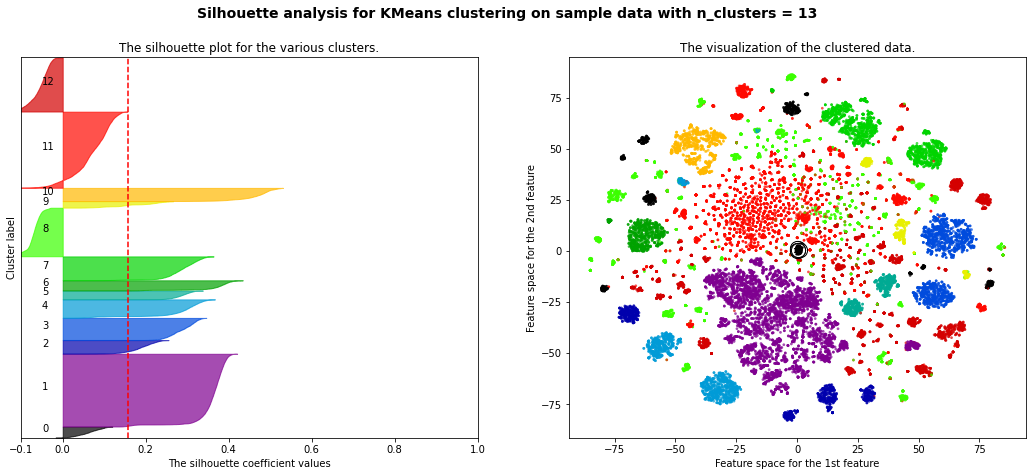

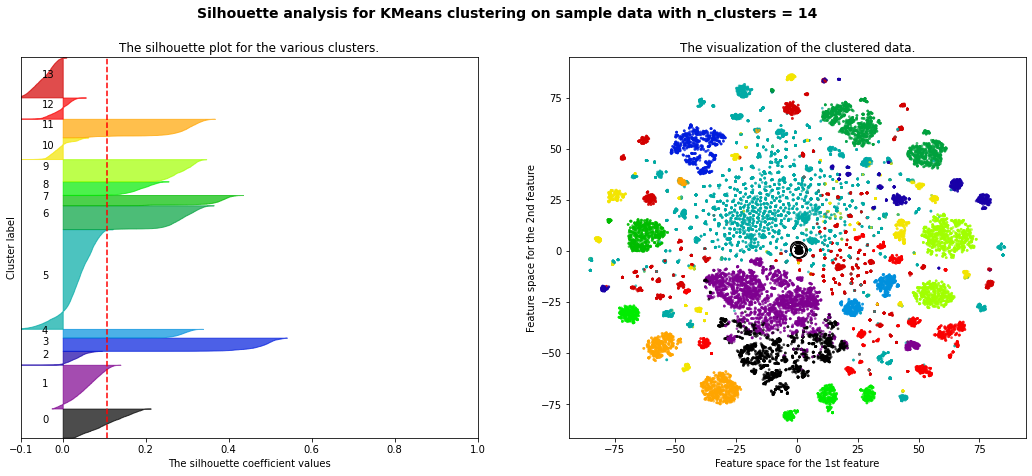

In [8]:
for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = pyplot.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    silhouettesDF = pandas.DataFrame(sample_silhouette_values)
    silhouettesDF.to_csv(f"/disk2/ksebestyen/silhouette{n_clusters}.csv")
    y_lower = 10

    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            numpy.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        embeddingsdf['x'], embeddingsdf['y'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    pyplot.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

pyplot.show()